In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

import pycountry

In [2]:
swiss_df = pd.read_csv('../Swiss2_0902_2302.csv',sep = ',',decimal = '.')
n_nodes = swiss_df['Year'].size

In [3]:
swiss_df['EventCode'].unique()

array([  42,   20,   40,   46,   51,  100,   36,   43,  112,   31,  130,
         57,   10,   50,   60,  120,   80,  110,  842,   37,   12,  164,
        874,   84,  173,  231,   61,   14,   41,  190,  356,   90,   30,
        193,  172,  111,  841,  128,  114,   75,   18,   70,   33,   64,
        233,   71,   13,  161,  181,  831,  160,  113,   16,   11,  192,
        833,  353,  243,   44,  134,  154, 1822,  311,  163,  180,   22,
       1123,  106,  101,  125,  124,  141,   39, 1056,  170,   45,   27,
        139,  871,   26,  873,   55,   73, 1711,  213,  174, 1124,  127,
         62,  138,  214, 1712,   53,   85,   17,  241,  182, 1241,  151])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109e3f4a8>]],
      dtype=object)

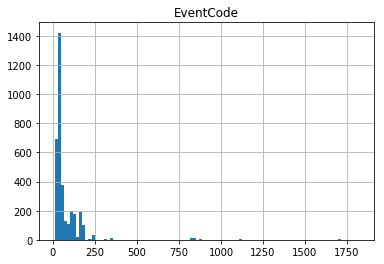

In [4]:
nb_bins = swiss_df['EventCode'].unique().size
swiss_df.hist(bins=nb_bins, column='EventCode')

In [5]:
# Plot nodes according to day and event code

eventCode = swiss_df['EventCode']
day = swiss_df['SQLDATE'] % 100

day_range = np.max(day) - np.min(day) + 1
day_vector = np.arange(np.min(day), np.max(day) + 1)

eventMat = np.zeros((eventCode.size, day_range))
eventMat.shape

for event, day in zip(eventCode, day):
    eventMat[event][day - 9] += 1
    
    
eventMat[300]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
print(np.sum(eventMat, axis=1))
event_length = eventMat.shape[0]

code_df = pd.DataFrame()
frequency_df = pd.DataFrame()
#df = df.append({'name': 'Zed', 'age': 9, 'height': 2}, ignore_index=True)

for i in range(0, event_length):
    if np.sum(eventMat, axis=1)[i] > 70:
        frequency_df = frequency_df.append({'frequency': eventMat[i]}, ignore_index=True)
        code_df = code_df.append({'eventCode': i}, ignore_index=True)
        
frequency_df = pd.DataFrame(frequency_df['frequency'].values.tolist())
code_df = pd.concat([code_df.reset_index(drop=True), frequency_df.reset_index(drop=True)], axis=1)
code_df = code_df.set_index('eventCode')
code_df.columns=['9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
                '20', '21', '22', '23']

[0. 0. 0. ... 0. 0. 0.]


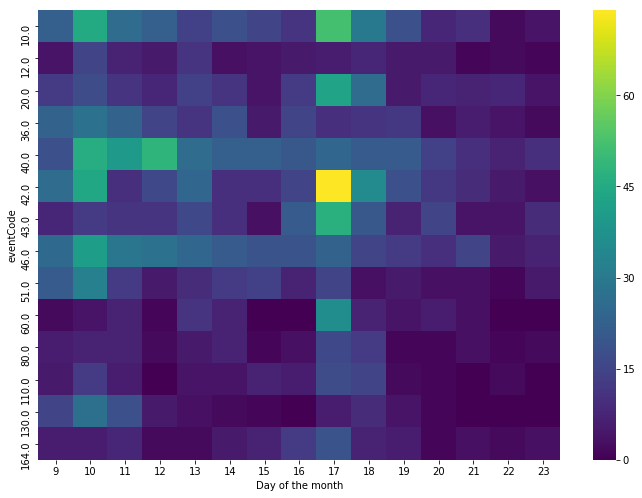

In [7]:
# Plot the number of occurences of each event code for each day

#plt.imshow(eventMat[0:30], cmap='hot', interpolation='nearest')
#plt.show()
import seaborn as sns

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.heatmap(code_df, annot=False, fmt="g", cmap='viridis', ax=ax)
plt.xlabel("Day of the month")
plt.show()

In [8]:
# Which countries are involved in these news?

pycountry_list = list(pycountry.countries)
nb_country = len(pycountry_list)
country_list = []

for i in range(0, nb_country):
    country_list.append(pycountry_list[i].name)
    
# Country_score is a vector used to compute the number of events triggered by each country following the Swiss votation

country_dict = dict.fromkeys(country_list)

country_score = np.zeros((nb_country, 1))
actor1_name = swiss_df['Actor1Name']
actor1_name = actor1_name.dropna()
actor1_name = actor1_name.unique()

#for i in range(0, len(actor1_name)):
 #   key = actor1_name[i]
  #  print("Key: ", key)
  #  if key in country_list:
   #     country_dict[key] += 1
    

In [9]:
# Actor1 Dictionary

actor1_name
actor1_dict = dict.fromkeys(actor1_name)

actor1_dict = dict((el,0) for el in actor1_name)

for i in range(0, len(actor1_name)):
    actor = actor1_name[i]
    actor1_dict[actor] += 1

/Users/aminmekacher/miniconda3/envs/gdelt_project/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


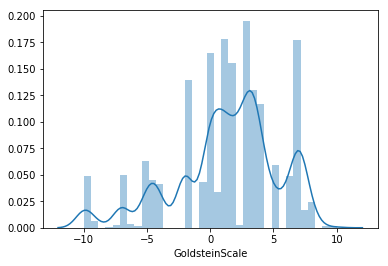

In [17]:
# Goldstein Scale analysis using the GoldsteinScale column

goldstein_df = swiss_df['GoldsteinScale']
np.max(goldstein_df), np.min(goldstein_df), np.mean(goldstein_df)

ax = sns.distplot(goldstein_df)

In [20]:
# To test the Goldstein scale efficiency, locate the events that are labeled with GoldsteinScale = +- 10

goldstein10_df = swiss_df.loc[swiss_df['GoldsteinScale'] == 10]

In [28]:
swiss_df.loc[swiss_df['EventCode'] == 874]

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
67,285305066,20140210,201402,2014,2014.1096,NaN,NaN,NaN,NaN,NaN,...,SZ,1,Switzerland,SZ,SZ,47.0000,8.00000,SZ,20140210,http://www.neurope.eu/article/after-swiss-refe...
801,285923664,20140214,201402,2014,2014.1205,GBR,BRITISH,GBR,NaN,NaN,...,SZ,1,Switzerland,SZ,SZ,47.0000,8.00000,SZ,20140214,http://www.pbs.org/newshour/bb/significance-sw...
1307,286464738,20140219,201402,2014,2014.1342,NaN,NaN,NaN,NaN,NaN,...,-2552151,4,"Geneva, Genè, Switzerland",SZ,SZ07,46.1956,6.14811,-2552151,20140219,http://www.theglobeandmail.com/news/world/who-...


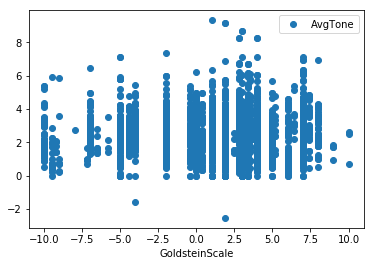

In [30]:
# Eigenmap using Goldstein Scale and AvgTone. The goal is to see if there is any correlation between these two indicators

avgtone_df = swiss_df['AvgTone']
swiss_df.plot(x='GoldsteinScale', y='AvgTone', style='o')